In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import pickle
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import LeaveOneGroupOut

In [2]:
save_dir = 'sliding_windows'
with open(os.path.join("full_dataset_labeled_neu.pkl"), "rb") as f:
    df = pickle.load(f)

In [3]:
df

,timestamp,participant_id,leftEyeOpenProbability,rightEyeOpenProbability,smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,...,contour_x_128,contour_y_128,contour_x_129,contour_y_129,contour_x_130,contour_y_130,contour_x_131,contour_y_131,date,depression_episode
0,1.658844e+09,P14,0.999208,0.997728,0.012413,3.200620,-6.709039,4.563066,-0.468451,0.438448,...,450,1438,524,1434,615,1424,355,1444,2022-07-26,0
1,1.658844e+09,P14,0.988258,0.999726,0.067954,4.665942,-8.082805,4.020031,-3.275228,-0.548229,...,447,1427,522,1425,614,1414,353,1430,2022-07-26,0
2,1.658844e+09,P14,0.996141,0.998313,0.025414,3.151020,-8.828184,3.722163,-0.586569,-0.050532,...,443,1420,517,1417,609,1407,350,1422,2022-07-26,0
3,1.658844e+09,P14,0.997481,0.937601,0.011907,3.969599,-8.271654,4.221522,-1.198644,0.872070,...,445,1429,517,1426,607,1417,351,1434,2022-07-26,0
4,1.658844e+09,P14,0.994761,0.998022,0.014574,3.954349,-7.665184,4.058447,-1.520600,-0.366995,...,458,1432,532,1428,623,1419,364,1439,2022-07-26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398645,1.661903e+09,P24,0.993337,0.998022,0.004574,8.419036,5.417893,-1.469929,1.528096,1.488326,...,536,1376,621,1383,701,1380,426,1367,2022-08-30,1
398646,1.661903e+09,P24,0.996592,0.997728,0.005419,8.017270,4.950450,-1.413510,1.025914,0.815550,...,536,1376,622,1383,703,1380,427,1368,2022-08-30,1
398647,1.661903e+09,P24,0.996592,0.995899,0.005849,8.763440,5.175384,-1.500107,0.124718,0.010406,...,546,1375,632,1382,713,1380,437,1367,2022-08-30,1
398648,1.661903e+09,P24,0.995225,0.997131,0.004574,8.044386,5.252989,-1.622733,0.982625,0.620477,...,550,1375,636,1381,717,1379,442,1367,2022-08-30,1


In [11]:
group_target_counts = df.groupby('participant_id')['depression_episode'].nunique()
print("Jumlah kelas unik per participant:")
print(group_target_counts.value_counts())

Jumlah kelas unik per participant:
depression_episode
1    21
2     3
Name: count, dtype: int64


In [12]:
# Cek jumlah missing values di tiap kolom
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

leftEyeOpenProbability       9175
rightEyeOpenProbability      9175
smilingProbability           9175
au_AU01                    197856
au_AU02                    197856
au_AU04                    197856
au_AU06                    197856
au_AU07                    197856
au_AU10                    197856
au_AU12                    197856
au_AU14                    197856
au_AU15                    197856
au_AU17                    197856
au_AU23                    197856
au_AU24                    197856
dtype: int64


In [4]:
for i in df.columns:
    print(i)

timestamp
participant_id
leftEyeOpenProbability
rightEyeOpenProbability
smilingProbability
headEulerAngle_X
headEulerAngle_Y
headEulerAngle_Z
au_AU01
au_AU02
au_AU04
au_AU06
au_AU07
au_AU10
au_AU12
au_AU14
au_AU15
au_AU17
au_AU23
au_AU24
contour_x_0
contour_y_0
contour_x_1
contour_y_1
contour_x_2
contour_y_2
contour_x_3
contour_y_3
contour_x_4
contour_y_4
contour_x_5
contour_y_5
contour_x_6
contour_y_6
contour_x_7
contour_y_7
contour_x_8
contour_y_8
contour_x_9
contour_y_9
contour_x_10
contour_y_10
contour_x_11
contour_y_11
contour_x_12
contour_y_12
contour_x_13
contour_y_13
contour_x_14
contour_y_14
contour_x_15
contour_y_15
contour_x_16
contour_y_16
contour_x_17
contour_y_17
contour_x_18
contour_y_18
contour_x_19
contour_y_19
contour_x_20
contour_y_20
contour_x_21
contour_y_21
contour_x_22
contour_y_22
contour_x_23
contour_y_23
contour_x_24
contour_y_24
contour_x_25
contour_y_25
contour_x_26
contour_y_26
contour_x_27
contour_y_27
contour_x_28
contour_y_28
contour_x_29
contour_y_29
co

In [4]:
df

,timestamp,participant_id,leftEyeOpenProbability,rightEyeOpenProbability,smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,...,contour_x_128,contour_y_128,contour_x_129,contour_y_129,contour_x_130,contour_y_130,contour_x_131,contour_y_131,date,depression_episode
0,1.658844e+09,P14,0.999208,0.997728,0.012413,3.200620,-6.709039,4.563066,-0.468451,0.438448,...,450,1438,524,1434,615,1424,355,1444,2022-07-26,0
1,1.658844e+09,P14,0.988258,0.999726,0.067954,4.665942,-8.082805,4.020031,-3.275228,-0.548229,...,447,1427,522,1425,614,1414,353,1430,2022-07-26,0
2,1.658844e+09,P14,0.996141,0.998313,0.025414,3.151020,-8.828184,3.722163,-0.586569,-0.050532,...,443,1420,517,1417,609,1407,350,1422,2022-07-26,0
3,1.658844e+09,P14,0.997481,0.937601,0.011907,3.969599,-8.271654,4.221522,-1.198644,0.872070,...,445,1429,517,1426,607,1417,351,1434,2022-07-26,0
4,1.658844e+09,P14,0.994761,0.998022,0.014574,3.954349,-7.665184,4.058447,-1.520600,-0.366995,...,458,1432,532,1428,623,1419,364,1439,2022-07-26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398645,1.661903e+09,P24,0.993337,0.998022,0.004574,8.419036,5.417893,-1.469929,1.528096,1.488326,...,536,1376,621,1383,701,1380,426,1367,2022-08-30,1
398646,1.661903e+09,P24,0.996592,0.997728,0.005419,8.017270,4.950450,-1.413510,1.025914,0.815550,...,536,1376,622,1383,703,1380,427,1368,2022-08-30,1
398647,1.661903e+09,P24,0.996592,0.995899,0.005849,8.763440,5.175384,-1.500107,0.124718,0.010406,...,546,1375,632,1382,713,1380,437,1367,2022-08-30,1
398648,1.661903e+09,P24,0.995225,0.997131,0.004574,8.044386,5.252989,-1.622733,0.982625,0.620477,...,550,1375,636,1381,717,1379,442,1367,2022-08-30,1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# for col in df.columns:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df[col].dropna(), kde=True, color='green')
#     plt.title(col)
#     plt.show()

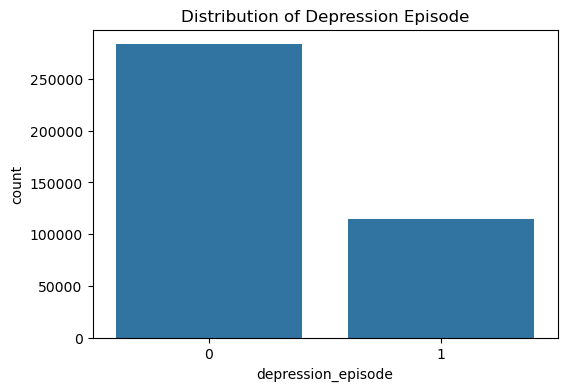

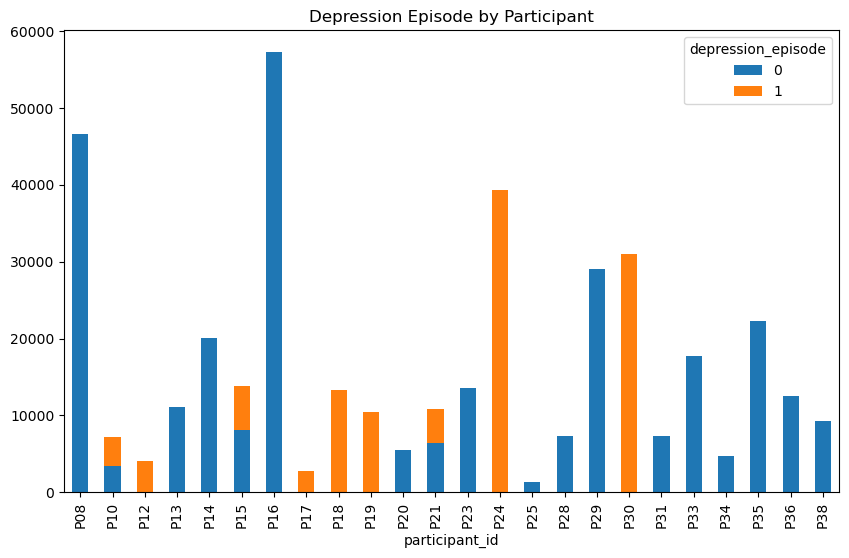

In [6]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='depression_episode', data=df)
plt.title('Distribution of Depression Episode')
plt.show()

# Participant-level analysis
participant_depression = df.groupby('participant_id')['depression_episode'].value_counts().unstack()
participant_depression.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Depression Episode by Participant')
plt.show()

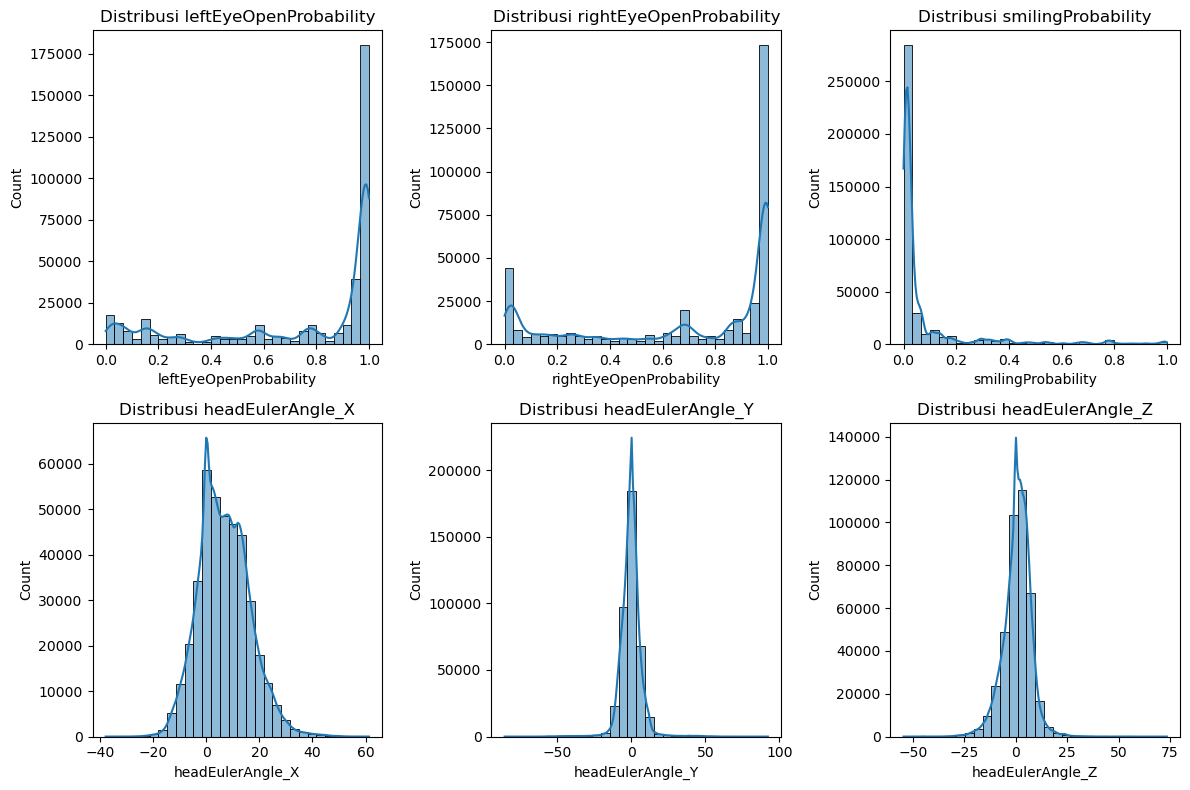

In [7]:
# Plot distribusi beberapa fitur utama
features = ["leftEyeOpenProbability", "rightEyeOpenProbability", "smilingProbability", 
            "headEulerAngle_X", "headEulerAngle_Y", "headEulerAngle_Z"]
plt.figure(figsize=(12, 8))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

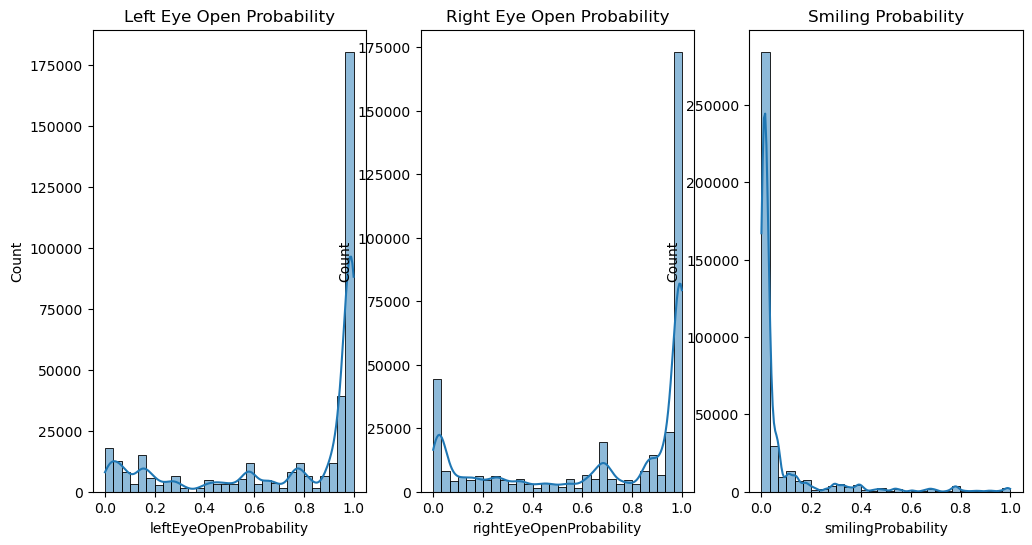

In [8]:
# Distribution of eye and smile probabilities
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['leftEyeOpenProbability'], kde=True, bins=30)
plt.title('Left Eye Open Probability')

plt.subplot(1, 3, 2)
sns.histplot(df['rightEyeOpenProbability'], kde=True, bins=30)
plt.title('Right Eye Open Probability')

plt.subplot(1, 3, 3)
sns.histplot(df['smilingProbability'], kde=True, bins=30)
plt.title('Smiling Probability')
plt.show()

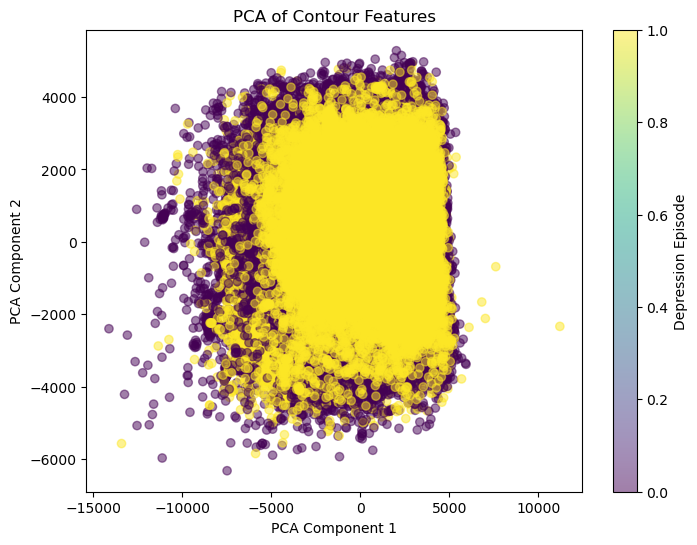

In [9]:
from sklearn.decomposition import PCA

# Extract contour features
contour_features = [col for col in df.columns if 'contour_' in col]
contour_data = df[contour_features]

# PCA for dimensionality reduction
pca = PCA(n_components=2)
contour_pca = pca.fit_transform(contour_data)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(contour_pca[:, 0], contour_pca[:, 1], c=df['depression_episode'], cmap='viridis', alpha=0.5)
plt.title('PCA of Contour Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Depression Episode')
plt.show()

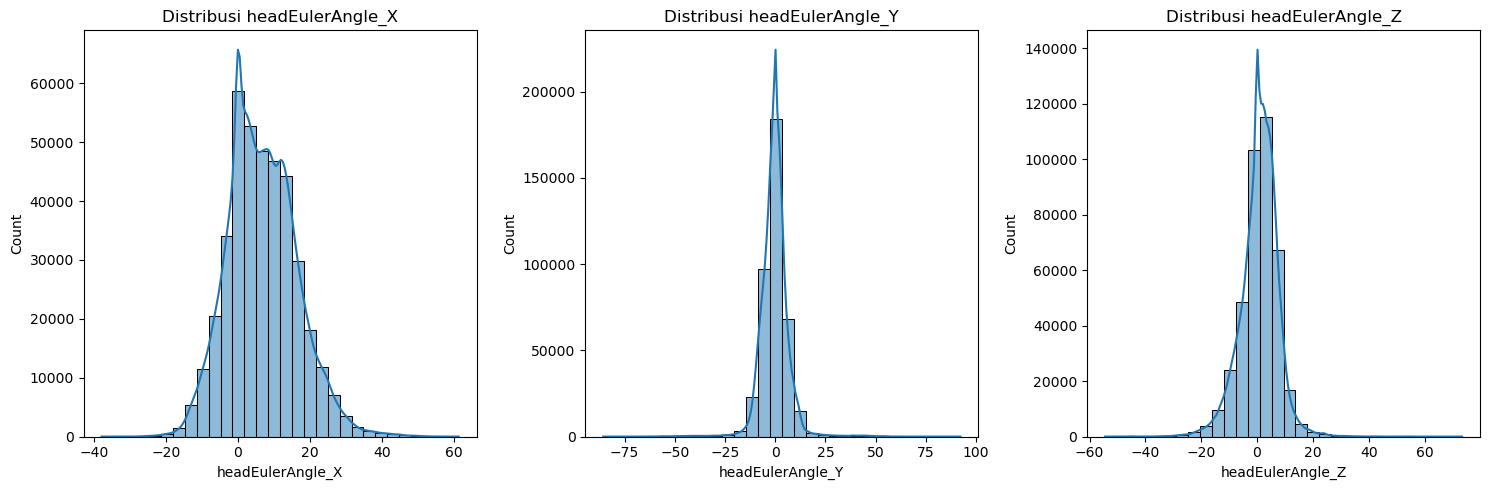

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, angle in enumerate(["headEulerAngle_X", "headEulerAngle_Y", "headEulerAngle_Z"]):
    sns.histplot(df[angle], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi {angle}")

plt.tight_layout()
plt.show()

In [12]:
# df = df.fillna(0)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['participant_id'] = le.fit_transform(df['participant_id'])

In [12]:
au_columns = [col for col in df.columns if col.startswith("au_AU")]
contour_columns = [col for col in df.columns if col.startswith("contour")]

df_eyeprob = df[['participant_id','rightEyeOpenProbability', "leftEyeOpenProbability", 'depression_episode']]
df_smileProb = df[['participant_id','smilingProbability', 'depression_episode']]
df_headEuler = df[['participant_id','headEulerAngle_X', 'headEulerAngle_Y', 'headEulerAngle_Z', 'depression_episode']]
df_au = df[['participant_id']+au_columns+['depression_episode']]
df_contour = df[['participant_id']+contour_columns+['depression_episode']]

In [15]:
data = [df_eyeprob, df_smileProb, df_headEuler, df_au, df_contour]
for i in data:
    print(i.isna().sum())

participant_id                0
rightEyeOpenProbability    9175
leftEyeOpenProbability     9175
depression_episode            0
dtype: int64
participant_id           0
smilingProbability    9175
depression_episode       0
dtype: int64
participant_id        0
headEulerAngle_X      0
headEulerAngle_Y      0
headEulerAngle_Z      0
depression_episode    0
dtype: int64
participant_id             0
au_AU01               197856
au_AU02               197856
au_AU04               197856
au_AU06               197856
au_AU07               197856
au_AU10               197856
au_AU12               197856
au_AU14               197856
au_AU15               197856
au_AU17               197856
au_AU23               197856
au_AU24               197856
depression_episode         0
dtype: int64
participant_id        0
contour_x_0           0
contour_y_0           0
contour_x_1           0
contour_y_1           0
                     ..
contour_x_130         0
contour_y_130         0
contour_x_131        

In [16]:
df['participant_id'].value_counts()

participant_id
6     57250
0     46650
13    39300
17    31000
16    29100
21    22250
4     20100
19    17800
5     13850
12    13550
8     13350
22    12550
3     11150
11    10900
9     10400
23     9300
15     7350
18     7300
1      7250
10     5450
20     4700
2      4050
7      2750
14     1300
Name: count, dtype: int64

## TRIAL 1

In [17]:
df = df.dropna()

In [18]:
X = df.drop(['depression_episode','timestamp', 'date'], axis=1)
y = df[['depression_episode']]

In [19]:
y.value_counts()

depression_episode
0                     157027
1                      43490
Name: count, dtype: int64

In [15]:
from collections import Counter
from imblearn.over_sampling import SMOTE
"""
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X = pd.DataFrame(X_res, columns=X.columns)
y = pd.DataFrame(y_res, columns=y.columns)
groups = X.participant_id
X = X.drop(columns='participant_id')
# Convert groups to NumPy array
groups = groups.to_numpy()

# Pastikan y berbentuk array 1D
y = y.values.ravel()
"""

"\nsm = SMOTE(random_state=42)\nX_res, y_res = sm.fit_resample(X, y)\nX = pd.DataFrame(X_res, columns=X.columns)\ny = pd.DataFrame(y_res, columns=y.columns)\ngroups = X.participant_id\nX = X.drop(columns='participant_id')\n# Convert groups to NumPy array\ngroups = groups.to_numpy()\n\n# Pastikan y berbentuk array 1D\ny = y.values.ravel()\n"

In [21]:
print(len(np.unique(groups)))

24


In [23]:
len(X)

314054

Optimal n_components: 6


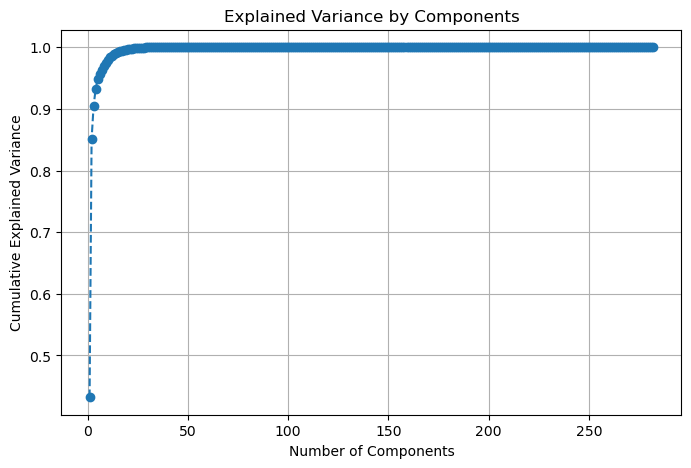

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalisasi sebelum PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA tanpa menentukan n_components dulu
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_optimal = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal n_components: {n_components_optimal}")

# Plot Variance Explained
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

In [24]:
len(y)

314054

In [16]:
import pickle
from sklearn.model_selection import LeaveOneGroupOut
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize

In [ ]:
X = df.drop(['depression_episode', 'timestamp', 'date'], axis=1)
y = df[['depression_episode']]

# Extract participant_id for later use as groups and then proceed with imputation/winsorization on features only
groups = X['participant_id']
# Note: We keep 'participant_id' in X temporarily if there are missing values but then skip winsorizing it.
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Winsorize numeric features (apply to all except participant_id)
for col in X.columns:
    if col != 'participant_id':  # skip winsorizing the group identifier
        X[col] = winsorize(X[col], limits=(0.05, 0.05))

# Now prepare data for resampling: use participant_id as groups then drop it from features
groups = X['participant_id']
X = X.drop(columns='participant_id')

# Apply SMOTEENN to address class imbalance
sm = SMOTEENN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X = pd.DataFrame(X_res, columns=X.columns)
y = pd.DataFrame(y_res, columns=y.columns)
groups = groups.to_numpy()

# Ensure y is a 1D array
y = y.values.ravel()

# Normalize before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of PCA components (95% cumulative explained variance)
pca = PCA()
pca.fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_optimal = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal n_components: {n_components_optimal}")

# Set up Leave-One-Group-Out cross-validation
logo = LeaveOneGroupOut()

# List of ensemble models to evaluate
ensemble_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
}

# Reduce dimensions with PCA
pca = PCA(n_components=n_components_optimal)
X_pca = pca.fit_transform(X)

# Storage for results
df_results = []

# Cross-validation using Leave-One-Group-Out
for train_idx, test_idx in logo.split(X_pca, y, groups=groups):
    X_train, X_test = X_pca[train_idx], X_pca[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    if len(np.unique(y_test)) < 2:
        continue  # Skip if test set contains only one class

    for model_name, model in ensemble_models.items():
        # Train the model
        model.fit(X_train, y_train)
        print(f'Model {model_name} sudah selesai di Training')

        # Make predictions
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute and store metrics
        try:
            auroc = roc_auc_score(y_test, y_proba)
        except ValueError:
            auroc = np.nan

        df_results.append({
            'model': model_name,
            'participant_id': groups[test_idx[0]],
            'auroc': auroc,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        })

# Summarize results
df_results = pd.DataFrame(df_results)
df_summary = df_results.groupby('model')[['auroc', 'accuracy', 'f1']].mean().reset_index()
df_summary.to_csv('imputed_knn_winsorized_full_features.csv', index=False)
print("Hasil ringkasan:")
print(df_summary)

In [31]:
df_summary.to_excel('Trial 1+full features+pca.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np
import os
import pickle
from sklearn.model_selection import LeaveOneGroupOut
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

save_dir = '../sliding_windows'
with open(os.path.join(save_dir, "full_dataset_labeled_neu.pkl"), "rb") as f:
    df = pickle.load(f)

# Preprocessing
le = LabelEncoder()
df['participant_id'] = le.fit_transform(df['participant_id'])
df = df.dropna()

# Pisahkan fitur dan target dengan BENAR (tanpa participant_id)
X = df.drop(['depression_episode','timestamp', 'date', 'participant_id'], axis=1)  # Hapus participant_id dari fitur
y = df['depression_episode'].values.ravel()  # Konversi ke array 1D
groups = df['participant_id'].values  # Array numpy untuk grouping

# Konversi ke numpy array untuk akses lebih cepat
X_np = X.values

# Model dengan parameter teroptimasi
ensemble_models = {
    'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, learning_rate=0.2, 
                            n_jobs=-1, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=50, n_jobs=-1, random_state=42, force_col_wise=True),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'CatBoost': CatBoostClassifier(iterations=50, depth=3, learning_rate=0.2)
}

# Hapus model yang lambat jika diperlukan
# del ensemble_models['GradientBoosting']
# del ensemble_models['CatBoost']

logo = LeaveOneGroupOut()
sm = SMOTE(random_state=42, k_neighbors=5)  # Gunakan k_neighbors lebih kecil
results = []

for train_idx, test_idx in logo.split(X_np, y, groups=groups):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Handle class imbalance hanya di data training
    X_res, y_res = sm.fit_resample(X_train, y_train)
    
    for model_name, model in ensemble_models.items():
        try:
            model.fit(X_res, y_res)
            
            # Prediksi
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)
            
            # Simpan hasil
            results.append({
                'model': model_name,
                'participant': groups[test_idx[0]],
                'auroc': roc_auc_score(y_test, y_proba) if len(np.unique(y_test)) > 1 else np.nan,
                'accuracy': accuracy_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred)
            })
        except Exception as e:
            print(f"Error dengan {model_name}: {str(e)}")

# Simpan hasil
df_results = pd.DataFrame(results)
df_summary = df_results.groupby('model')[['auroc', 'accuracy', 'f1']].mean().reset_index()
df_summary.to_csv('result/optimized_results.csv', index=False)
print("Hasil ringkasan:")
print(df_summary)


### EYE PROBABILITY

In [34]:
df_eyeprob = df_eyeprob.dropna()

In [35]:
X = df_eyeprob.drop(columns='depression_episode')
y = df_eyeprob[['depression_episode']]

In [36]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X = pd.DataFrame(X_res, columns=X.columns)
y = pd.DataFrame(y_res, columns=y.columns)
groups = X.participant_id
X = X.drop(columns='participant_id')
# Convert groups to NumPy array
groups = groups.to_numpy()
# Pastikan y berbentuk array 1D
y = y.values.ravel()

In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np

logo = LeaveOneGroupOut()
# List of ensemble models
ensemble_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42)
}

# Metrics storage
df_results = []

for train_idx, test_idx in logo.split(X.values, y, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    if len(np.unique(y_test)) < 2:
        continue  # Skip jika test set hanya punya 1 kelas

    for model_name, model in ensemble_models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Store metrics
        try:
            auroc = roc_auc_score(y_test, y_proba)
        except ValueError:
            auroc = np.nan

        df_results.append({
            'model': model_name,
            'participant_id': groups[test_idx[0]],
            'auroc': auroc,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        })

# Convert results to DataFrame
df_results = pd.DataFrame(df_results)

# Display summary statistics
df_summary = df_results.groupby('model')[['auroc', 'accuracy', 'f1']].mean().reset_index()
df_summary.to_excel('Trial 1+eye prob.xlsx', index=False)
df_summary

C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [06:01:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [06:05:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boostin

,model,auroc,accuracy,f1
0,AdaBoost,0.500443,0.472100,0.498675
1,Bagging,0.740376,0.631539,0.672344
2,CatBoost,0.678797,0.556857,0.562293
3,GradientBoosting,0.544446,0.505507,0.537311
4,LightGBM,0.596061,0.510349,0.516018
5,RandomForest,0.738068,0.627601,0.667316
6,XGBoost,0.520525,0.474671,0.509277


### Smile Probability

In [38]:
df_smileProb.dropna(inplace=True)

C:\Users\Latief\AppData\Local\Temp\ipykernel_12344\587626810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smileProb.dropna(inplace=True)


In [39]:
X = df_smileProb.drop(columns='depression_episode')
y = df_smileProb[['depression_episode']]

In [40]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X = pd.DataFrame(X_res, columns=X.columns)
y = pd.DataFrame(y_res, columns=y.columns)
groups = X.participant_id
X = X.drop(columns='participant_id')
# Convert groups to NumPy array
groups = groups.to_numpy()
# Pastikan y berbentuk array 1D
y = y.values.ravel()

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np

logo = LeaveOneGroupOut()

# List of ensemble models
ensemble_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42)
}

# Metrics storage
df_results = []

for train_idx, test_idx in logo.split(X.values, y, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    if len(np.unique(y_test)) < 2:
        continue  # Skip jika test set hanya punya 1 kelas

    for model_name, model in ensemble_models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Store metrics
        try:
            auroc = roc_auc_score(y_test, y_proba)
        except ValueError:
            auroc = np.nan

        df_results.append({
            'model': model_name,
            'participant_id': groups[test_idx[0]],
            'auroc': auroc,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        })

# Convert results to DataFrame
df_results = pd.DataFrame(df_results)

# Display summary statistics
df_summary = df_results.groupby('model')[['auroc', 'accuracy', 'f1']].mean().reset_index()
df_summary.to_excel('Trial 1+smileprob.xlsx', index=False)
df_summary

C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [06:12:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [06:14:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boostin

,model,auroc,accuracy,f1
0,AdaBoost,0.465387,0.398823,0.333138
1,Bagging,0.469831,0.397062,0.329513
2,CatBoost,0.468824,0.396957,0.329159
3,GradientBoosting,0.466548,0.399465,0.336416
4,LightGBM,0.468751,0.396664,0.327952
5,RandomForest,0.469242,0.396278,0.327766
6,XGBoost,0.471230,0.401000,0.339337


### Head Euler

In [42]:
df_headEuler = df_headEuler.dropna()

In [43]:
X = df_headEuler.drop(columns='depression_episode')
y = df_headEuler[['depression_episode']]

In [44]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X = pd.DataFrame(X_res, columns=X.columns)
y = pd.DataFrame(y_res, columns=y.columns)
groups = X.participant_id
X = X.drop(columns='participant_id')
# Convert groups to NumPy array
groups = groups.to_numpy()
# Pastikan y berbentuk array 1D
y = y.values.ravel()

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np

logo = LeaveOneGroupOut()

# List of ensemble models
ensemble_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42)
}

# Metrics storage
df_results = []

for train_idx, test_idx in logo.split(X.values, y, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    if len(np.unique(y_test)) < 2:
        continue  # Skip jika test set hanya punya 1 kelas

    for model_name, model in ensemble_models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Store metrics
        try:
            auroc = roc_auc_score(y_test, y_proba)
        except ValueError:
            auroc = np.nan

        df_results.append({
            'model': model_name,
            'participant_id': groups[test_idx[0]],
            'auroc': auroc,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        })

# Convert results to DataFrame
df_results = pd.DataFrame(df_results)

# Display summary statistics
df_summary = df_results.groupby('model')[['auroc', 'accuracy', 'f1']].mean().reset_index()
df_summary.to_excel('Trial 1+headEuler.xlsx', index=False)
df_summary

C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [06:21:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [06:28:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boostin

,model,auroc,accuracy,f1
0,AdaBoost,0.457489,0.487607,0.194435
1,Bagging,0.599659,0.544905,0.159258
2,CatBoost,0.467690,0.436527,0.184699
3,GradientBoosting,0.439484,0.432426,0.190520
4,LightGBM,0.447445,0.436134,0.185059
5,RandomForest,0.592131,0.511007,0.170467
6,XGBoost,0.474923,0.439665,0.184038


### Action Unit

In [46]:
df_au = df_au.dropna()

In [47]:
X = df_au.drop(columns='depression_episode')
y = df_au[['depression_episode']]

In [48]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X = pd.DataFrame(X_res, columns=X.columns)
y = pd.DataFrame(y_res, columns=y.columns)
groups = X.participant_id
X = X.drop(columns='participant_id')
# Convert groups to NumPy array
groups = groups.to_numpy()
# Pastikan y berbentuk array 1D
y = y.values.ravel()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np

logo = LeaveOneGroupOut()

# List of ensemble models
ensemble_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42)
}

# Metrics storage
df_results = []

for train_idx, test_idx in logo.split(X.values, y, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    if len(np.unique(y_test)) < 2:
        continue  # Skip jika test set hanya punya 1 kelas

    for model_name, model in ensemble_models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Store metrics
        try:
            auroc = roc_auc_score(y_test, y_proba)
        except ValueError:
            auroc = np.nan

        df_results.append({
            'model': model_name,
            'participant_id': groups[test_idx[0]],
            'auroc': auroc,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        })

# Convert results to DataFrame
df_results = pd.DataFrame(df_results)

# Display summary statistics
df_summary = df_results.groupby('model')[['auroc', 'accuracy', 'f1']].mean().reset_index()
df_summary.to_excel('Trial 1+action unit.xlsx', index=False)
df_summary

C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [07:40:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [07:50:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boostin

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np
import os
import pickle
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import LeaveOneGroupOut
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

df['leftEyeOpenProbability'] = df['leftEyeOpenProbability'].fillna(df['leftEyeOpenProbability'].mean())
df['rightEyeOpenProbability'] = df['rightEyeOpenProbability'].fillna(df['rightEyeOpenProbability'].mean())
df['smilingProbability'] = df['smilingProbability'].fillna(df['smilingProbability'].mean()) 

df_eyeprob = df[['participant_id','rightEyeOpenProbability', "leftEyeOpenProbability", 'smilingProbability', 'depression_episode']]
# df_eyeprob= df_eyeprob.dropna()

X = df_eyeprob.drop(columns='depression_episode')
y = df_eyeprob[['depression_episode']]



sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X = pd.DataFrame(X_res, columns=X.columns)
y = pd.DataFrame(y_res, columns=y.columns)
groups = X.participant_id
X = X.drop(columns='participant_id')
# Convert groups to NumPy array
groups = groups.to_numpy()
# Pastikan y berbentuk array 1D
y = y.values.ravel()

scaler = RobustScaler()
X = scaler.fit_transform(X)


logo = LeaveOneGroupOut()
# List of ensemble models
ensemble_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=1),
    'CatBoost': CatBoostClassifier(verbose=1, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42)
}

# Metrics storage
df_results = []

for train_idx, test_idx in logo.split(X, y, groups=groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    if len(np.unique(y_test)) < 2:
        continue  # Skip jika test set hanya punya 1 kelas

    for model_name, model in ensemble_models.items():
        # Train model
        model.fit(X_train, y_train)
        print(f'Model {model_name} sudah selesai di Training')

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Store metrics
        try:
            auroc = roc_auc_score(y_test, y_proba)
        except ValueError:
            auroc = np.nan

        df_results.append({
            'model': model_name,
            'participant_id': groups[test_idx[0]],
            'auroc': auroc,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        })

# Convert results to DataFrame
df_results = pd.DataFrame(df_results)
df_summary = df_results.groupby('model')[['auroc', 'accuracy', 'f1']].mean().reset_index()
df_summary.to_csv(f'eyeSmileprob_featuresMean_result.csv', index=False)
print(df_summary)

Model RandomForest sudah selesai di Training
Model GradientBoosting sudah selesai di Training


C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost sudah selesai di Training
[LightGBM] [Info] Number of positive: 274176, number of negative: 280351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 554527, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494432 -> initscore=-0.022272
[LightGBM] [Info] Start training from score -0.022272
Model LightGBM sudah selesai di Training
Learning rate set to 0.152964
0:	learn: 0.6855343	total: 130ms	remaining: 2m 9s
1:	learn: 0.6801967	total: 227ms	remaining: 1m 53s
2:	learn: 0.6742462	total: 310ms	remaining: 1m 42s
3:	learn: 0.6691541	total: 404ms	remaining: 1m 40s
4:	learn: 0.6643285	total: 495ms	remaining: 1m 38s
5:	learn: 0.6610890	total: 594ms	remaining: 1m 38s
6:	learn: 0.6578298	total

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model AdaBoost sudah selesai di Training
Model Bagging sudah selesai di Training
Model RandomForest sudah selesai di Training
Model GradientBoosting sudah selesai di Training


C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:26:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost sudah selesai di Training
[LightGBM] [Info] Number of positive: 269486, number of negative: 275575
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 545061, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494414 -> initscore=-0.022343
[LightGBM] [Info] Start training from score -0.022343
Model LightGBM sudah selesai di Training
Learning rate set to 0.151843
0:	learn: 0.6854051	total: 118ms	remaining: 1m 57s
1:	learn: 0.6793288	total: 206ms	remaining: 1m 42s
2:	learn: 0.6742454	total: 313ms	remaining: 1m 44s
3:	learn: 0.6701532	total: 399ms	remaining: 1m 39s
4:	learn: 0.6659440	total: 491ms	remaining: 1m 37s
5:	learn: 0.6620877	total: 609ms	remaining: 1m 40s
6:	learn: 0.6585430	tota

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model AdaBoost sudah selesai di Training
Model Bagging sudah selesai di Training
Model RandomForest sudah selesai di Training
Model GradientBoosting sudah selesai di Training


C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost sudah selesai di Training
[LightGBM] [Info] Number of positive: 272671, number of negative: 277300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 549971, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495792 -> initscore=-0.016834
[LightGBM] [Info] Start training from score -0.016834
Model LightGBM sudah selesai di Training
Learning rate set to 0.152426
0:	learn: 0.6858696	total: 99.4ms	remaining: 1m 39s
1:	learn: 0.6791249	total: 177ms	remaining: 1m 28s
2:	learn: 0.6733458	total: 248ms	remaining: 1m 22s
3:	learn: 0.6687037	total: 321ms	remaining: 1m 20s
4:	learn: 0.6645382	total: 392ms	remaining: 1m 17s
5:	learn: 0.6626430	total: 456ms	remaining: 1m 15s
6:	learn: 0.6594972	tot

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model AdaBoost sudah selesai di Training
Model Bagging sudah selesai di Training
              model     auroc  accuracy        f1
0          AdaBoost  0.500104  0.425524  0.388526
1           Bagging  0.739554  0.656447  0.699491
2          CatBoost  0.777429  0.697764  0.728901
3  GradientBoosting  0.603267  0.534297  0.561304
4          LightGBM  0.743150  0.666261  0.702367
5      RandomForest  0.730731  0.649766  0.692224
6           XGBoost  0.634711  0.556375  0.580587


In [ ]:
import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np
import os
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df[['timestamp','participant_id','headEulerAngle_X', 'headEulerAngle_Y', 'headEulerAngle_Z','date', 'depression_episode']]



X = df.drop(['depression_episode', 'timestamp'], axis=1)
y = df[['depression_episode']]

# Opsional: Oversampling jika diperlukan
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)
# X = pd.DataFrame(X_res, columns=X.columns)
# y = pd.DataFrame(y_res, columns=y.columns)

# Cek distribusi kelas secara keseluruhan


# Jika grouping dengan participant_id + date menghasilkan grup homogen,
# gunakan grouping berdasarkan participant_id saja.
# groups = (X['participant_id'].astype(str) + '_' + X['date'].astype(str)).values
groups = df['participant_id'].values

# Hapus kolom grouping dari fitur
X = X.drop(columns=['participant_id', 'date'])

# Pastikan target y berbentuk array 1D
y = y.values.ravel()





# Inisialisasi LeaveOneGroupOut
logo = LeaveOneGroupOut()

# Daftar model ensemble
ensemble_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42)
}

# Storage untuk hasil metrik
df_results = []

# Loop untuk cross-validation dengan LeaveOneGroupOut
for train_idx, test_idx in logo.split(X.values, y, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Lewati fold jika hanya terdapat satu kelas
    if len(np.unique(y_test)) < 2:
        continue

    # Terapkan SMOTE hanya pada data training
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    for model_name, model in ensemble_models.items():
        # Nested Cross-Validation untuk training (KFold)
        inner_cv = KFold(n_splits=5)
        
        # Prediksi probabilitas dengan cross_val_predict menggunakan data yang sudah di-resample
        y_proba_train = cross_val_predict(
            model, X_train_res, y_train_res, cv=inner_cv, 
            method='predict_proba', n_jobs=-1
        )[:, 1]
        
        # Latih model pada data training yang sudah di-resample
        model.fit(X_train_res, y_train_res)
        print(f"Model {model_name} telah dilatih pada data training (SMOTE)")
        
        # Prediksi pada data test (data asli, tanpa SMOTE)
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
        
        # Hitung metrik evaluasi
        try:
            auroc = roc_auc_score(y_test, y_proba)
        except ValueError:
            auroc = np.nan
        
        df_results.append({
            'model': model_name,
            'participant': groups[test_idx[0]],
            'auroc': auroc,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        })

# Simpan dan tampilkan hasil jika ada
if df_results:
    df_results = pd.DataFrame(df_results)
    df_summary = df_results.groupby('model')[['auroc', 'accuracy', 'f1']].mean().reset_index()
    df_summary.to_csv('hybrid_headEuler.csv', index=False)
    print(df_summary)
else:
    print("No results were collected. Please check your cross-validation splits and data balance.")


Model RandomForest telah dilatih pada data training (SMOTE)
Model GradientBoosting telah dilatih pada data training (SMOTE)


C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:07:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost telah dilatih pada data training (SMOTE)
Model LightGBM telah dilatih pada data training (SMOTE)
Model CatBoost telah dilatih pada data training (SMOTE)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model AdaBoost telah dilatih pada data training (SMOTE)
Model Bagging telah dilatih pada data training (SMOTE)
Model RandomForest telah dilatih pada data training (SMOTE)
Model GradientBoosting telah dilatih pada data training (SMOTE)


C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:28:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost telah dilatih pada data training (SMOTE)
Model LightGBM telah dilatih pada data training (SMOTE)
Model CatBoost telah dilatih pada data training (SMOTE)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model AdaBoost telah dilatih pada data training (SMOTE)
Model Bagging telah dilatih pada data training (SMOTE)
Model RandomForest telah dilatih pada data training (SMOTE)
Model GradientBoosting telah dilatih pada data training (SMOTE)


C:\Users\Latief\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:49:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost telah dilatih pada data training (SMOTE)
Model LightGBM telah dilatih pada data training (SMOTE)


In [22]:
df

,timestamp,participant_id,leftEyeOpenProbability,rightEyeOpenProbability,smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,...,contour_x_128,contour_y_128,contour_x_129,contour_y_129,contour_x_130,contour_y_130,contour_x_131,contour_y_131,date,depression_episode
0,1.658844e+09,4,0.999208,0.997728,0.012413,3.200620,-6.709039,4.563066,-0.468451,0.438448,...,450,1438,524,1434,615,1424,355,1444,2022-07-26,0
1,1.658844e+09,4,0.988258,0.999726,0.067954,4.665942,-8.082805,4.020031,-3.275228,-0.548229,...,447,1427,522,1425,614,1414,353,1430,2022-07-26,0
2,1.658844e+09,4,0.996141,0.998313,0.025414,3.151020,-8.828184,3.722163,-0.586569,-0.050532,...,443,1420,517,1417,609,1407,350,1422,2022-07-26,0
3,1.658844e+09,4,0.997481,0.937601,0.011907,3.969599,-8.271654,4.221522,-1.198644,0.872070,...,445,1429,517,1426,607,1417,351,1434,2022-07-26,0
4,1.658844e+09,4,0.994761,0.998022,0.014574,3.954349,-7.665184,4.058447,-1.520600,-0.366995,...,458,1432,532,1428,623,1419,364,1439,2022-07-26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398645,1.661903e+09,13,0.993337,0.998022,0.004574,8.419036,5.417893,-1.469929,1.528096,1.488326,...,536,1376,621,1383,701,1380,426,1367,2022-08-30,1
398646,1.661903e+09,13,0.996592,0.997728,0.005419,8.017270,4.950450,-1.413510,1.025914,0.815550,...,536,1376,622,1383,703,1380,427,1368,2022-08-30,1
398647,1.661903e+09,13,0.996592,0.995899,0.005849,8.763440,5.175384,-1.500107,0.124718,0.010406,...,546,1375,632,1382,713,1380,437,1367,2022-08-30,1
398648,1.661903e+09,13,0.995225,0.997131,0.004574,8.044386,5.252989,-1.622733,0.982625,0.620477,...,550,1375,636,1381,717,1379,442,1367,2022-08-30,1
